
  #                                  CREDIT SCORE PREDICTION

# 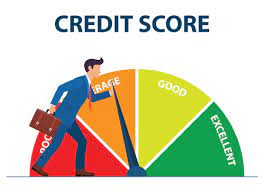

# SCOPE & OBJECTIVE

A credit score is a number that shows how trustworthy someone is with borrowing money. It's used by banks and other lenders to decide if they should lend money to someone and how much interest to charge. The main goal of a credit score is to help lenders make fair and consistent decisions about lending, while also encouraging people to manage their money responsibly.A credit score is a number that shows how trustworthy someone is with borrowing money. It's used by banks and other lenders to decide if they should lend money to someone and how much interest to charge. The main goal of a credit score is to help lenders make fair and consistent decisions about lending, while also encouraging people to manage their money responsibly.

# Meta Data

<ol>   
    <li><b>ID: </b> Represents a unique identification for each row</li><li><b>Customer_ID: </b> Represents a unique identification of a human</li><li><b>Month: </b> Represents the month of the year</li><li><b>Name: </b> Represents the name of a human</li><li><b>Age: </b> Represents the age of the human</li><li><b>SSN: </b> Represents the social security number of a human</li><li><b>Occupation: </b> Represents the occupation of the human</li><li><b>Annual_Income: </b> Represents the annual income of the human</li><li><b>Monthly_Inhand_Salary: </b> Represents the monthly base salary of a human</li><li><b>Num_Bank_Accounts: </b> Represents the number of bank accounts a human holds</li><li><b>Num_Credit_Card: </b> Represents the number of other credit cards held by a human</li><li><b>Interest_Rate: </b> Represents the interest rate on credit card</li><li><b>Num_of_Loan: </b> Represents the number of loans taken from the bank</li><li><b>Type_of_Loan: </b> Represents the types of loan taken by a human</li><li><b>Delay_from_due_date: </b> Represents the average number of days delayed from the payment date</li><li><b>Num_of_Delayed_Payment: </b> Represents the average number of payments delayed by a human</li><li><b>Changed_Credit_Limit: </b> Represents the percentage change in credit card limit</li><li><b>Num_Credit_Inquiries: </b> Represents the number of credit card inquiries</li><li><b>Credit_Mix: </b> Represents the classification of the mix of credits</li><li><b>Outstanding_Debt: </b> Represents the remaining debt to be paid (in USD)</li><li><b>Credit_Utilization_Ratio: </b> Represents the utilization ratio of credit card</li><li><b>Credit_History_Age: </b> Represents the age of credit history of the human</li><li><b>Payment_of_Min_Amount: </b> Represents whether only the minimum amount was paid by the human</li><li><b>Total_EMI_per_month: </b> Represents the monthly EMI payments (in USD)</li><li><b>Amount_invested_monthly: </b> Represents the monthly amount invested by the customer (in USD)</li><li><b>Payment_Behaviour: </b> Represents the payment behavior of the customer</li><li><b>Monthly_Balance: </b> Represents the monthly balance amount of the customer (in USD)</li><li><b>Credit_Score: </b> Represents the bracket of credit score (Poor, Standard, Good)</li>  
</ol>

IMPORTING REQUIRED LIBRARIES

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import collections
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE 
df=pd.read_csv("D:\\DATASETS\\credit final dataset.csv")
pd.set_option("display.max_columns",None)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,11.27,4,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4,11.27,4,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


CHECKING NUMBER OF UNIQUE VALUES

In [7]:
df.nunique().sort_values()

Credit_Score                     3
Payment_of_Min_Amount            3
Credit_Mix                       3
Payment_Behaviour                6
Month                            8
Num_of_Loan                     10
Num_Bank_Accounts               12
Num_Credit_Card                 12
Occupation                      15
Num_Credit_Inquiries            18
Num_of_Delayed_Payment          26
Interest_Rate                   34
Age                             43
Delay_from_due_date             63
Credit_History_Age             404
Changed_Credit_Limit          2860
Type_of_Loan                  6261
Name                         10128
Total_EMI_per_month          11890
Outstanding_Debt             12203
Amount_invested_monthly      12261
Annual_Income                12488
SSN                          12500
Customer_ID                  12500
Monthly_Inhand_Salary        13241
Monthly_Balance              98492
Credit_Utilization_Ratio     99998
ID                          100000
dtype: int64

CHECKING NULL VALUES IN DATASET

In [8]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

From above instance there are no null values in dataset.

CHANGE THE COLUMN NAMES INTO LOWER CASE

In [9]:
df.columns=[i.lower() for i in df.columns]
df.head(2)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,Good,809.98,26.82262,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,11.27,4,Good,809.98,31.94496,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good


CHECKING SOME STATISTICS ON DATASET

In [10]:
df.describe()

,id,customer_id,month,age,ssn,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


# EXPLORATORY DATA ANALYSIS

<Axes: xlabel='credit_score', ylabel='count'>

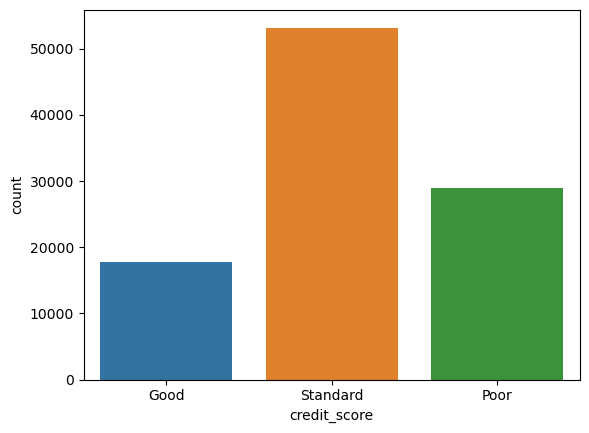

In [11]:
sns.countplot(x=df["credit_score"])

# Transaction according to age groups

In [12]:
age = {}
x = 0
ages = df.age.value_counts()
for i in range(14, 57):
    x += ages[i]
    #print(x)
   # print(age)
    if i == 20:
        age['14-20'] = x
        x = 0
        print(age)
    elif i == 30:
        age['21-30'] = x
        x = 0
    elif i == 40:
        age['31-40'] = x
        x = 0
    elif i == 50:
        age['41-50'] = x
        x = 0
    elif i == 56:
        age['51-56'] = x
age_groups = pd.DataFrame({'Age_range': age.keys(), 'Total_persons': age.values()})
age_groups

{'14-20': 14003}


,Age_range,Total_persons
0,14-20,14003
1,21-30,28793
2,31-40,28968
3,41-50,21006
4,51-56,7230


In [13]:
ages[14]

1197

# Visualization of age_groups

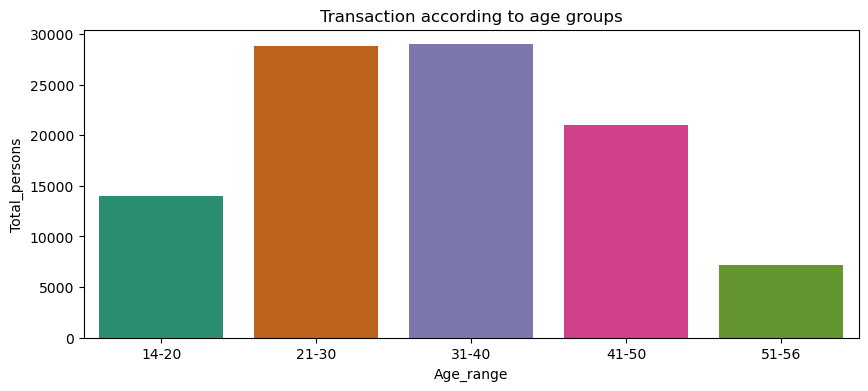

In [14]:
plt.figure(figsize=(10,4), dpi=100)
plt.title('Transaction according to age groups')
sns.barplot(data=age_groups, x='Age_range', y='Total_persons', palette='Dark2')
plt.show()

# CORRELATION

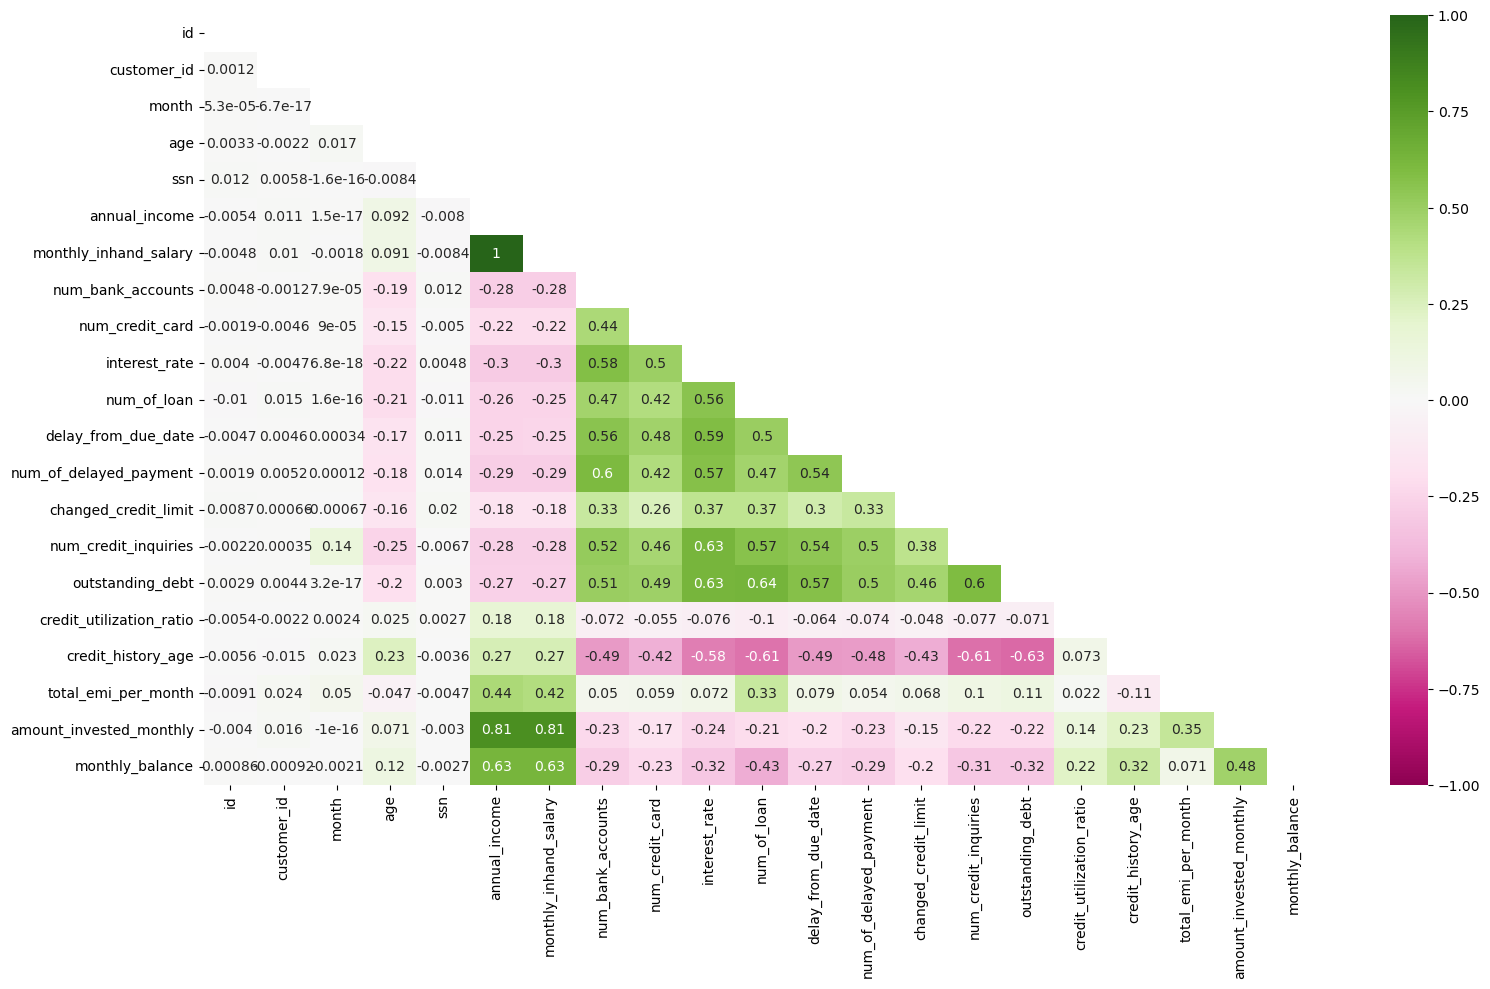

In [15]:
plt.figure(figsize=(18, 10))
sns.heatmap(
    df.corr(), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
);

# Different type of Payment Behaviour in dataset


In [16]:
pd.DataFrame({'payment_behaviour': df['payment_behaviour'].unique()})

,payment_behaviour
0,High_spent_Small_value_payments
1,Low_spent_Large_value_payments
2,Low_spent_Medium_value_payments
3,Low_spent_Small_value_payments
4,High_spent_Medium_value_payments
5,High_spent_Large_value_payments


 in above information we see,There are 6 different types of payment behaviour in our dataset

# Income distribution for each Occupation

In [17]:
income_distribution = df[['occupation', 'annual_income']].groupby('occupation').sum()
income_distribution

,annual_income
occupation,
Accountant,3.420970e+08
Architect,3.539977e+08
Developer,3.368630e+08
Doctor,3.252326e+08
Engineer,3.482152e+08
Entrepreneur,3.389662e+08
Journalist,3.165391e+08
Lawyer,3.519206e+08
Manager,3.310343e+08


# Visualization of Income distribution

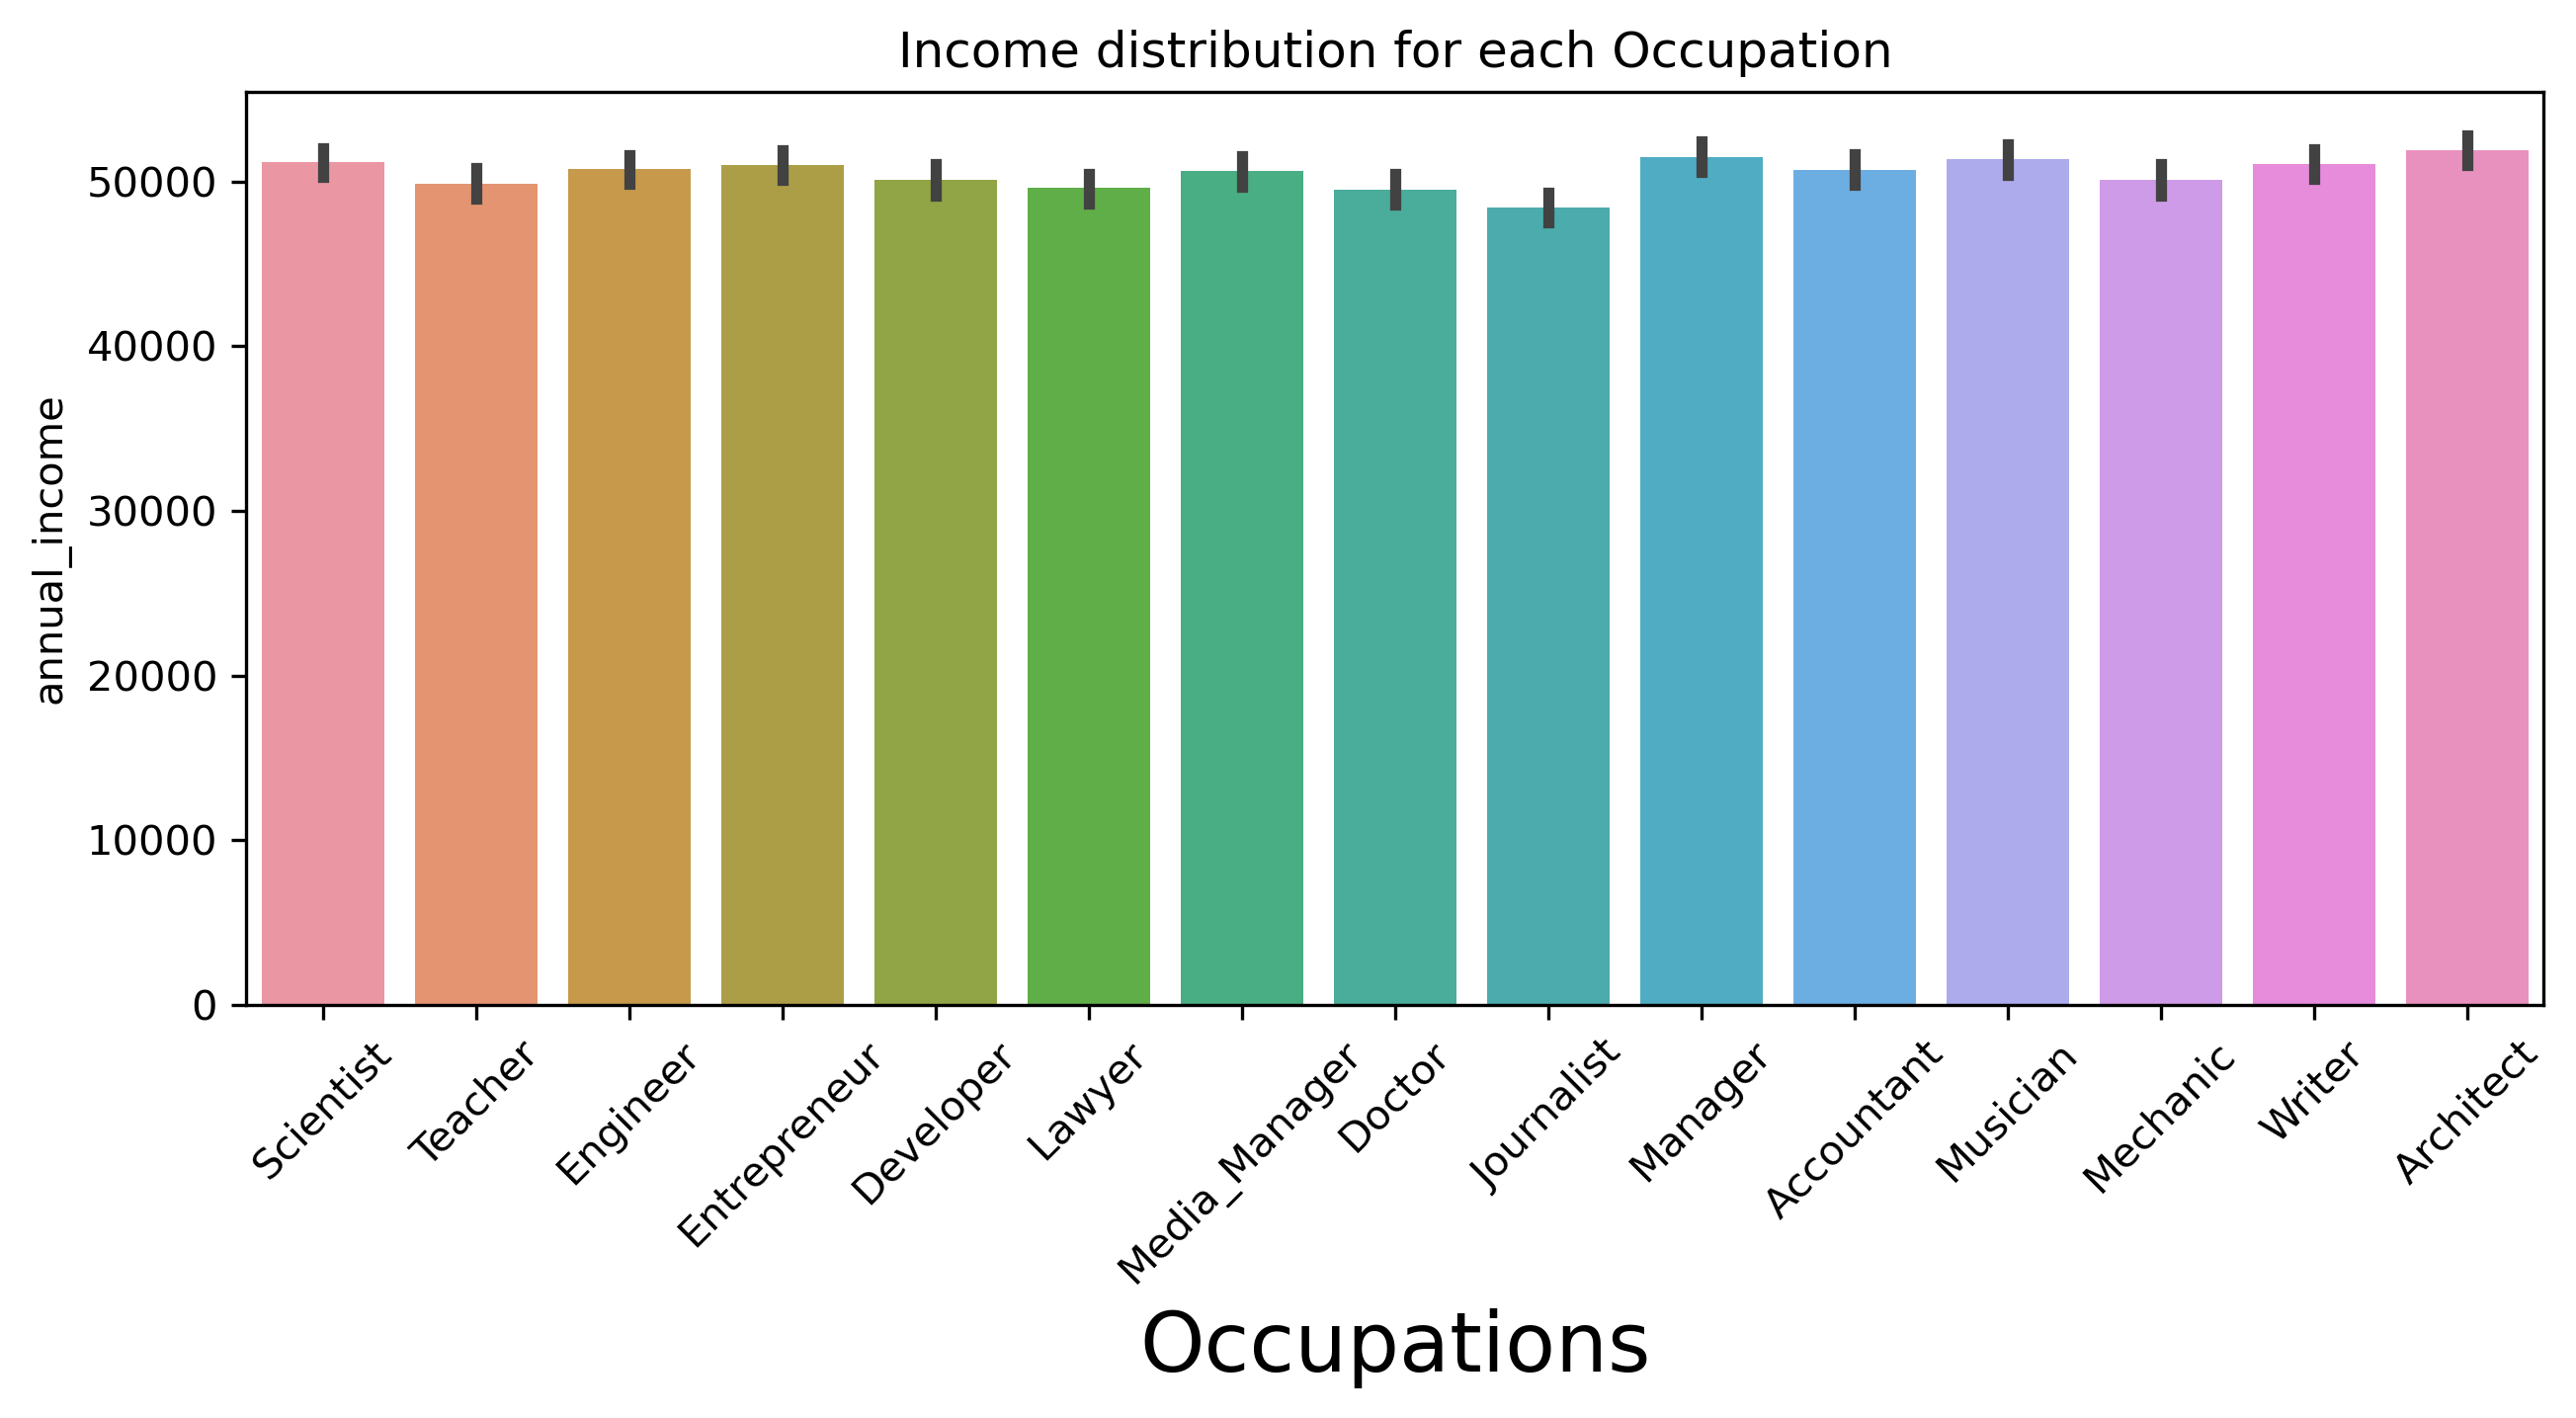

In [18]:
plt.figure(figsize=(10,4), dpi=300)
plt.xticks(rotation=45)
plt.title('Income distribution for each Occupation')
sns.barplot(x = df['occupation'],y = df['annual_income'])
plt.xlabel('Occupations',size=20)
plt.show()

In [19]:
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,11.27,4,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4,11.27,4,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


# FEATURE ENGINEERING

In [52]:
col=["type_of_loan","credit_mix","payment_behaviour","payment_of_min_amount","occupation"]

LABEL ENCODING

In [53]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


In [64]:
for i in col:
    df[i]=label.fit_transform(df[i])
    

In [65]:
df.head(2)

,id,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0.000000,12,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,128,0.048387,0.28,0.365332,0.235294,1,0.16202,0.227421,0.655087,1,0.027865,0.049438,2,0.263941,0
1,0.000007,12,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,128,0.048387,0.16,0.365332,0.235294,1,0.16202,0.398165,0.657568,1,0.027865,0.049438,3,0.240405,0


In the above data we use LabelEncoding to Change our String data into numeric Data

In [66]:
df.drop(columns=['customer_id','month','name','age','ssn'],inplace=True)

KeyError: "['customer_id', 'month', 'name', 'age', 'ssn'] not found in axis"

# MINMAX SCALER

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
for i in df.columns:
    if i=='credit_score':
        continue
    else:
        df[i] = mms.fit_transform(df[[i]])

In [57]:
df.head(2)

,id,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0.000000,12,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,128,0.048387,0.28,0.365332,0.235294,1,0.16202,0.227421,0.655087,1,0.027865,0.049438,2,0.263941,2
1,0.000007,12,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,128,0.048387,0.16,0.365332,0.235294,1,0.16202,0.398165,0.657568,1,0.027865,0.049438,3,0.240405,2


In the above data we changes all features into samescale data,Except target variable

# TO CHANGE TARGET VARIABLE INTO NUMERIC

In [58]:
val =[]
for i in df['credit_score']:
    if i == 'Good':
        val.append(2)
    elif i == 'Standard':
        val.append(1)
    else:
        val.append(0)

In [59]:
df['credit_score'] = val

In [60]:
df.head(2)

,id,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0.000000,12,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,128,0.048387,0.28,0.365332,0.235294,1,0.16202,0.227421,0.655087,1,0.027865,0.049438,2,0.263941,0
1,0.000007,12,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,128,0.048387,0.16,0.365332,0.235294,1,0.16202,0.398165,0.657568,1,0.027865,0.049438,3,0.240405,0


# OUTLIER DETECTION OUTLIERS IN DATASET

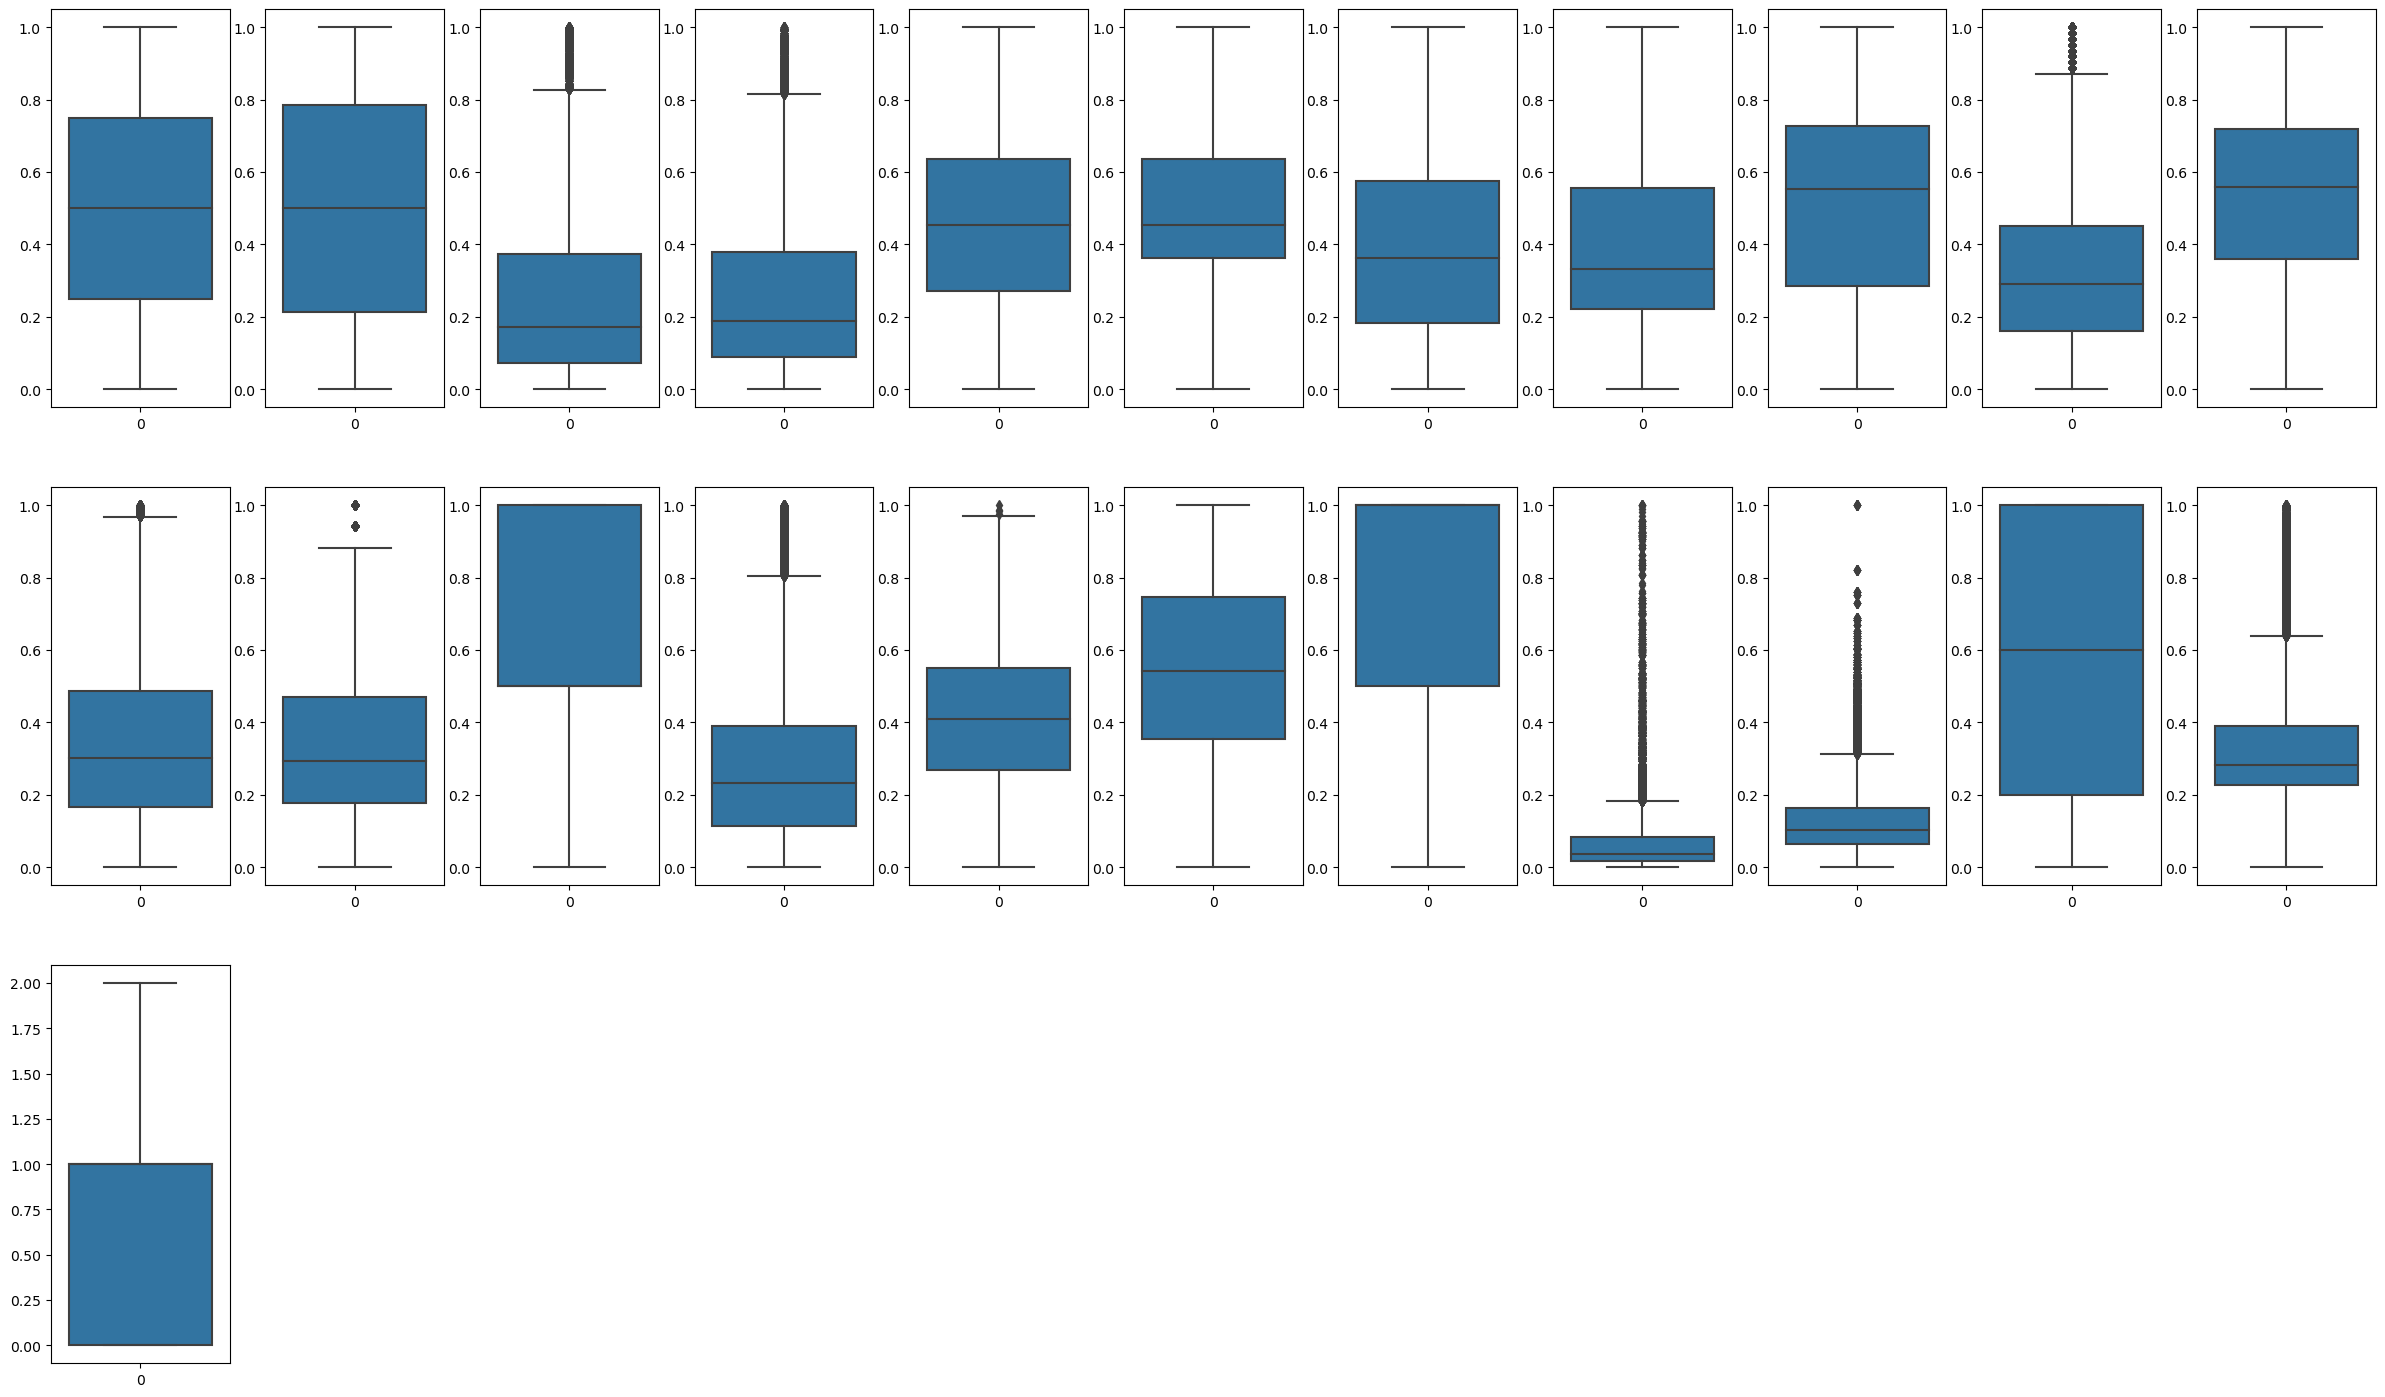

In [32]:
plt.figure(figsize=(30, 30))

for i in range(len(df.columns)):
    plt.subplot(5, 11, i + 1)
    sns.boxplot(df[df.columns[i]])
plt.show()

In the above plot we seen many outliers.It may affect our model perfomances,so we should remove it

In [33]:
i_model=IsolationForest()
i_model.fit(df)

IsolationForest()

In [34]:
outlier_pred = i_model.predict(df)

In [35]:
outliers=[]
index=[]
for i,j in enumerate(outlier_pred):
    if j==-1:
        index.append(i)
        outliers.append(j)

In [36]:
len(outliers)

36869

In [37]:
df1=df.drop(index=index,axis=0)

# FIXING THE IMBALANCED DATA IN TARGET VARIABLE USING SMOTE

BEFORE SMOTE

<Axes: xlabel='credit_score', ylabel='count'>

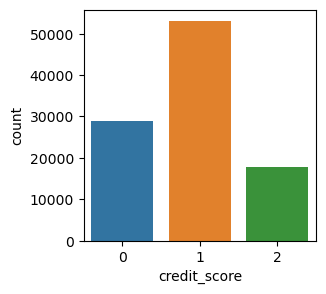

In [38]:
plt.figure(figsize=(3,3))
sns.countplot(x=df['credit_score'])

In the above plot  we seen the data is Imbalanced,If the data is imbalance then the highest priority class has been biased rest of the classes.

# USING SMOTE-ENN

SPLITTING X AND Y

In [39]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [40]:
before=collections.Counter(y)
print('before smote : ',before)

before smote :  Counter({1: 38304, 0: 14246, 2: 10581})


In [41]:
SYNTHETIC MINORITY OVER SAMPLING TECHNIQUE-EDITED NEAREST NEIGHBOUR

SyntaxError: invalid syntax (409283300.py, line 1)

sm=SMOTEENN()

In [ ]:
x,y=sm.fit_resample(x,y)
after=collections.Counter(y)
print('after smote :',after)

In the above Data,we using smote to make all the data as balanced data.

In [ ]:
#df1 = pd.DataFrame(x,y)

# MODEL BUILDING

# TRAIN TEST SPLIT

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=40)

# RANDOM FOREST

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
Model = RandomForestClassifier()

In [45]:
Model.fit(xtrain,ytrain)

RandomForestClassifier()

In [46]:
pred_train = Model.predict(xtrain)
pred_test = Model.predict(xtest)

In [47]:
from sklearn.metrics import *

In [48]:
accuracy_score(ytrain,pred_train)

0.9999773709578873

In [49]:
accuracy_score(ytest,pred_test)

0.8302006335797254

# Accuracy Score

In [ ]:
print('Train accuracy for random forest classifier :',accuracy_score(ytrain,pred_train))

In [ ]:
print('Test accuracy for random forest classifier :',accuracy_score(ytest,pred_test))

# Confusion Matrix

In [50]:
confusion_matrix(ytest,pred_test)

array([[3469,  821,    9],
       [ 883, 9845,  679],
       [  10,  814, 2410]], dtype=int64)

# Classification Report

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4299
           1       0.86      0.86      0.86     11407
           2       0.78      0.75      0.76      3234

    accuracy                           0.83     18940
   macro avg       0.81      0.81      0.81     18940
weighted avg       0.83      0.83      0.83     18940



Our model Give Good Accuracy For Both Train and Test data,so It is Generalized Model

# XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,test_size=0.30,random_state=40)

In [ ]:
model1=XGBClassifier()
model1.fit(xtrain1,ytrain1)

In [ ]:
Pred_train1 = model1.predict(xtrain1)
Pred_test1 = model1.predict(xtest1)

In [ ]:
accuracy_score(ytrain1,Pred_train1)

In [ ]:
accuracy_score(ytest1,Pred_test1)

# Accuracy Score

In [ ]:
print('Train accuracy for XGBOOST classifier :',accuracy_score(ytrain1,Pred_train1))

In [ ]:
print('Test accuracy for XGBOOST classifier :',accuracy_score(ytest1,Pred_test1))

# Confusion Matrix

In [ ]:
confusion_matrix(ytest1,Pred_test1)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest1,Pred_test1))